In [1]:
#import required libraries
import numpy as np   #library of matrix operations
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Softmax Regression (Multiclass Logistic Regression)

In [2]:
#load the iris dataset, it is a python dictionary
iris = datasets.load_iris()
#this converting is only for visualization purposes
iris_df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
print(iris_df.head())
print(np.unique(iris.target))
print({0: "Iris-Setosa", 1: "Iris-Versicolour", 2:"Iris-Virginica" })

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 1 2]
{0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}


In [3]:
#Task: Identify virginica from the rest based on  petal length (column 2) and petal width (column 3)
X = iris["data"][:, (2, 3)]  # petal length, petal width
#append 1s to the beginning to account for the bias
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)


#convert to onehot encoding
y = iris["target"] # there are 3 classes
Y = np.zeros((y.shape[0], len(np.unique(y))))   #make a Nxk
Y[np.arange(y.shape[0]), y] = 1

print(X.shape, np.unique(Y))


(150, 3) [0. 1.]


In [4]:

def plot_class_wise(X, Y, W=None, pl_line=False):
    #plot decision boundary
    if pl_line == True:
        #change the colors for more than 3 regions
        col = ['lightcoral', 'lightskyblue', 'palegreen']
        min1, max1 = X[:, 1].min() - 1, X[:, 1].max() + 1
        min2, max2 = X[:, 2].min() - 1, X[:, 2].max() + 1

        x1_scale = np.arange(min1, max1, 1e-2)
        x2_scale = np.arange(min2, max2, 1e-2)

        x1_grid, x2_grid = np.meshgrid(x1_scale, x2_scale)

        x_1g, x_2g = x1_grid.flatten(), x2_grid.flatten()
        x_1g, x_2g = x_1g.reshape((len(x_1g), 1)), x_2g.reshape((len(x_2g), 1))
        grid = np.hstack((np.ones((x_1g.shape[0], 1)), x_1g, x_2g))
        print(grid.shape)
        y_pred = grid @ W

        y_pred = np.argmax(y_pred, axis=1)

        #print(y_pred.min(), y_pred.max())

        op_grid = y_pred.reshape(x1_grid.shape)

        #op_grid = y_pred.reshape(x1_grid.shape)

        surface = plt.contourf(x1_grid, x2_grid, op_grid, levels=2, colors=col)
        plt.colorbar(surface)
        ####################################################################################################################################################



    #s is the marker size array corresponding to each training example. Thus the y matrix can be used (plots only the virginica) as other radius is 0 and is ignored
    #Similarly 1-y is will show the other classes, multiplied by 10 to increase visibility
    plt.title("Virginica vs (versicolor and sentosa)")
    plt.xlabel('Petal Length (in cm)')
    plt.ylabel("Petal width (in cm)")

    y = np.argmax(Y, axis=1)
    #print(y)
    plt.scatter(X[:, 1], X[:,2], s=20*(1-y)*(2-y)/2.0, marker='o', color = 'r', label = 'Setosa')
    plt.scatter(X[:, 1], X[:,2], s=20*y*(2-y), marker='o', color = 'b', label = 'Versicolor')
    plt.scatter(X[:, 1], X[:,2], s=20*y*(y-1)/2.0, marker='o', color = 'g', label = 'Virginica')
    plt.legend(loc='upper left')
    plt.show()
    #####################################################################################################################################################

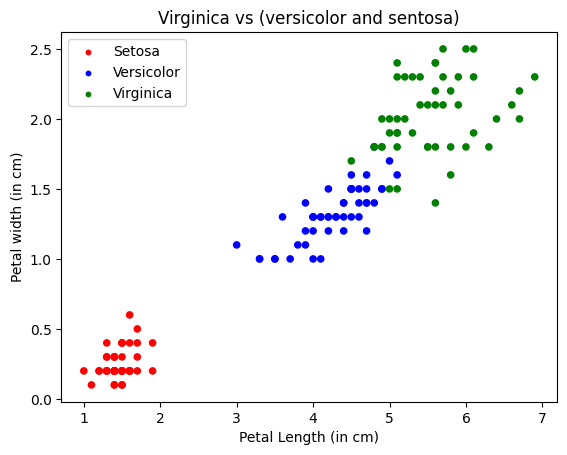

In [5]:
plot_class_wise(X, Y)

In [6]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=1, keepdims=True)

#with gradient descent
def loss_f_softmax(X, W, Y):
    Y_hat = softmax(X@W)  #dim - R^(nxk)
    #binary cross entropy loss
    L = -1*np.sum(Y*np.log(Y_hat))
    return L/Y.shape[0]

def gradient_softmax(X, W, Y):
    error = softmax(X@W)- Y   #dim: R^(Nxk)

    #vectorized implementation: parallelize in numpy  = X^T(sigmoid(Xw) - y)/m
    return (X.T @ error)/Y.shape[0]  #dim R^(dxk)


def learn_params_softmax(X, Y, lr, num_epochs):
    # W \in R^(dxk), X \in R^(Nxd), Y \in R(Nxk)
    W = np.zeros(shape=(X.shape[1], Y.shape[1]))

    loss = []
    for i in range(num_epochs):
        #calculate the loss
        loss.append(loss_f_softmax(X, W, Y))
        W = W - lr*gradient_softmax(X, W, Y)

    return W, loss

w, loss = learn_params_softmax(X, Y, 0.1, 1000)
print(w)

[[ 4.4680008  -0.37179578 -4.09620503]
 [-0.92863815  0.6198596   0.30877855]
 [-1.84310141 -0.71591459  2.559016  ]]


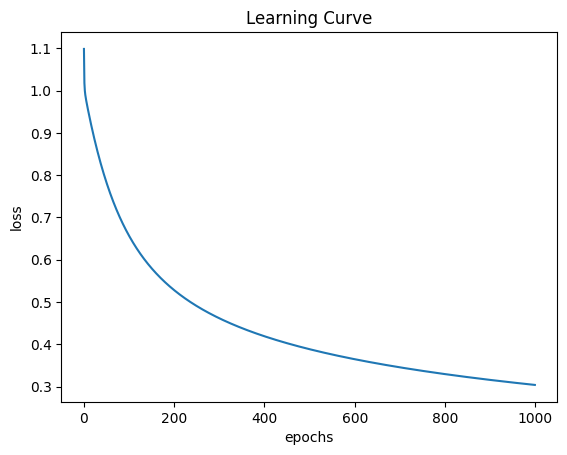

In [7]:
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Learning Curve")
plt.show()

(347600, 3)


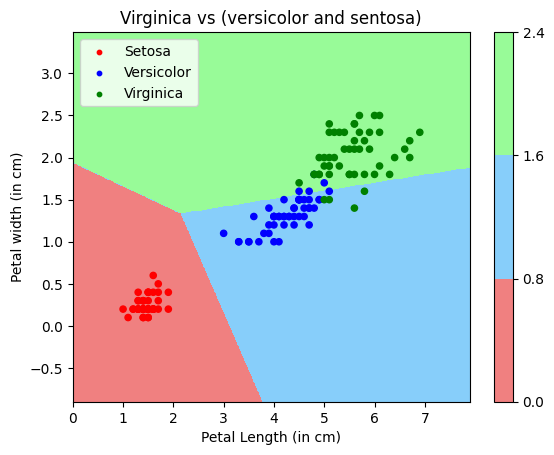

In [8]:
plot_class_wise(X, Y, w, pl_line=True)

In [ ]:
print("Train Accuracy = ", np.sum(np.argmax(X@w, axis=1).astype('int') == y.astype('int'))/X.shape[0])

Train Accuracy =  0.9466666666666667
